<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Практика" data-toc-modified-id="Практика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Практика</a></span><ul class="toc-item"><li><span><a href="#Определение-вероятности.-События" data-toc-modified-id="Определение-вероятности.-События-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Определение вероятности. События</a></span><ul class="toc-item"><li><span><a href="#Задача-1" data-toc-modified-id="Задача-1-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Задача 1</a></span></li><li><span><a href="#Задача-2" data-toc-modified-id="Задача-2-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Задача 2</a></span></li><li><span><a href="#Задача-3" data-toc-modified-id="Задача-3-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Задача 3</a></span></li><li><span><a href="#Задача-4" data-toc-modified-id="Задача-4-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Задача 4</a></span></li></ul></li><li><span><a href="#Вероятность-суммы-событий" data-toc-modified-id="Вероятность-суммы-событий-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вероятность суммы событий</a></span><ul class="toc-item"><li><span><a href="#Задача-5" data-toc-modified-id="Задача-5-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Задача 5</a></span></li><li><span><a href="#Задача-6" data-toc-modified-id="Задача-6-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Задача 6</a></span></li></ul></li><li><span><a href="#Случайные-величины" data-toc-modified-id="Случайные-величины-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Случайные величины</a></span><ul class="toc-item"><li><span><a href="#Задача-7" data-toc-modified-id="Задача-7-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Задача 7</a></span></li><li><span><a href="#Задача-8" data-toc-modified-id="Задача-8-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Задача 8</a></span></li></ul></li><li><span><a href="#Условные-вероятности" data-toc-modified-id="Условные-вероятности-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Условные вероятности</a></span><ul class="toc-item"><li><span><a href="#Задача-9" data-toc-modified-id="Задача-9-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Задача 9</a></span></li><li><span><a href="#Задача-10" data-toc-modified-id="Задача-10-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Задача 10</a></span></li></ul></li></ul></li></ul></div>

# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline
from itertools import product
import warnings
warnings.filterwarnings('ignore')

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

##### Вариант 1

In [52]:
coin = ['head', 'tail']
# можно бросать одну монету 2 раз и сравнивать результаты 1-го и 2-го броска
event_A = [(np.random.choice(coin) != np.random.choice(coin))]

# задаем число экспериментов
n = 100000
# формируем выборку 
A = pd.Series([np.random.choice(coin) != np.random.choice(coin) for x in range(n)])
# # считаем статистику выпадений событий когда стороны не совпали 
P_event_A = len(A[A==True])/len(A)
P_event_A

0.50201

##### Вариант 2

In [58]:
n = 100000
# формируем выборку 
A = pd.Series([np.random.randint(2) != np.random.randint(2) for x in range(n)])
# # считаем статистику выпадений событий когда стороны не совпали 
P_event_A = len(A[A==True])/len(A)
P_event_A

0.50369

### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [103]:
#  создадим dataset 
n = 10000
dict_A = {'Coin_1':[np.random.choice(coin) for x in range(n)],
          'Coin_2':[np.random.choice(coin) for x in range(n)],
          'Coin_3':[np.random.choice(coin) for x in range(n)]}
A = pd.DataFrame(data=dict_A)
A.head()

,Coin_1,Coin_2,Coin_3
0,tail,head,head
1,head,head,head
2,head,tail,tail
3,tail,tail,tail
4,head,tail,tail


In [100]:
# для описания множества всех элементарных событий выберем из dataset уникальные строки
A = A.sort_values(by = ['Coin_1', 'Coin_2','Coin_3'])
elementary_events_set = A.drop_duplicates()
elementary_events_set

,Coin_1,Coin_2,Coin_3
0,head,head,head
26,head,head,tail
4,head,tail,head
2,head,tail,tail
5,tail,head,head
8,tail,head,tail
3,tail,tail,head
11,tail,tail,tail


In [101]:
elementary_events_set.shape

(8, 3)

In [122]:
# A = {не выпало ни одного герба}
n = 10000
dict_A = {'Coin_1':[np.random.choice(coin) for x in range(n)],
          'Coin_2':[np.random.choice(coin) for x in range(n)],
          'Coin_3':[np.random.choice(coin) for x in range(n)]}
A = pd.DataFrame(data=dict_A)

P_A = len(A[(A.Coin_1=='tail')&(A.Coin_2=='tail')&(A.Coin_3=='tail')])/len(A)
P_A


0.1247

In [118]:
# B = {выпало четное число гербов}
n = 10000
dict_A = {'Coin_1':[np.random.choice(coin) for x in range(n)],
          'Coin_2':[np.random.choice(coin) for x in range(n)],
          'Coin_3':[np.random.choice(coin) for x in range(n)]}
A = pd.DataFrame(data=dict_A)

def isHead(a):
    '''возвращает 1 если выпал герб("head")'''
    return 1 if a=='head' else 0

def evenHead(row):
    '''Возвращает True если четное кол-во гербов'''
    return True if isHead(row['Coin_1'])+isHead(row['Coin_1'])+isHead(row['Coin_1']) % 2 == 0 else False

A['even_heard'] = A.apply(evenHead, axis=1)
P_B = len(A[A.even_heard==True])/len(A)
P_B

0.5071

In [119]:
# C = {на третьей монете выпал герб}
n = 10000
dict_A = {'Coin_1':[np.random.choice(coin) for x in range(n)],
          'Coin_2':[np.random.choice(coin) for x in range(n)],
          'Coin_3':[np.random.choice(coin) for x in range(n)]}
A = pd.DataFrame(data=dict_A)

P_C = len(A[A.Coin_3=='head'])/len(A)
P_C

0.4915

Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [149]:
chois = ['E','L','not']
n=1000
dict_judge = {'J_1': [np.random.choice(chois) for x in range(n)],
              'J_2': [np.random.choice(chois) for x in range(n)],
              'J_3': [np.random.choice(chois) for x in range(n)]}
A3 = pd.DataFrame(data=dict_judge)

def win(row):
    '''Возвращает побидетеля голосования '''
    lst = [row['J_1'],row['J_2'],row['J_3']]
    if lst.count('E')>1:
        return 'E'
    elif lst.count('L')>1:
        return 'L'
    else:
        return 'not'

A3['Win'] = A3.apply(win, axis=1)
P_A3 = len(A3[A3['Win']=='L'])/len(A3)
P_B3 = len(A3[A3['Win']=='E'])/len(A3)
print(f'Вероятность выбора L: {P_A3}\nВероятность выбора E: {P_B3}\n{7/27}')


Вероятность выбора L: 0.265
Вероятность выбора E: 0.263
0.25925925925925924


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [158]:
dice = [ x for x in range(1,7)]

n = 1000
dict_two_dice = {'dice_1': [np.random.choice(dice) for x in range(n)],
                  'dice_2': [np.random.choice(dice) for x in range(n)]}
A4 = pd.DataFrame(data=dict_two_dice)
# для описания множества всех элементарных событий выберем из dataset уникальные строки
A4 = A4.sort_values(by = ['dice_1', 'dice_2'])
elementary_events_set4 = A4.drop_duplicates()
elementary_events_set4


,dice_1,dice_2
0,1,1
35,1,2
10,1,3
3,1,4
26,1,5
9,1,6
16,2,1
1,2,2
63,2,3
37,2,4


In [164]:
# A = {вышло две "шестерки"}
n = 10000
dict_two_dice = {'dice_1': [np.random.choice(dice) for x in range(n)],
                  'dice_2': [np.random.choice(dice) for x in range(n)]}
A4 = pd.DataFrame(data=dict_two_dice)
P_A4 = len(A4[(A4['dice_1']==6)&(A4['dice_2']==6)])/len(A4)
print(f'Вероятность выпадения двух "шестерок" {P_A4}. \t Аналитически: {1/36}')

Вероятность выпадения двух "шестерок" 0.0295. 	 Аналитически: 0.027777777777777776


In [166]:
# B = {сумма выпавших очков не меньше 11}
n = 10000
dict_two_dice = {'dice_1': [np.random.choice(dice) for x in range(n)],
                  'dice_2': [np.random.choice(dice) for x in range(n)]}
A4 = pd.DataFrame(data=dict_two_dice)
A4['Sum'] = A4['dice_1']+A4['dice_2']
P_B4 = len(A4[(A4['Sum']>=11)])/len(A4)
print(f'Вероятность выпавших очков не меньше 11 {P_B4}. \t Аналитически: {3/36}')

Вероятность выпадения двух "шестерок" 0.0851. 	 Аналитически: 0.08333333333333333


In [173]:
# C = {не выпала ни одна "шестерка"}
n = 10000
dict_two_dice = {'dice_1': [np.random.choice(dice) for x in range(n)],
                  'dice_2': [np.random.choice(dice) for x in range(n)]}
A4 = pd.DataFrame(data=dict_two_dice)
P_С4 = len(A4[(A4['dice_1']<6)&(A4['dice_2']<6)])/len(A4)
print(f'Вероятность что не выпала ни одна "шестерка" {P_С4}. \t Аналитически: {25/36}')

Вероятность что не выпала ни одна "шестерка" 0.6945. 	 Аналитически: 0.6944444444444444


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [175]:
n = 10000
dict_two_dice = {'dice_1': [np.random.choice(dice) for x in range(n)],
                  'dice_2': [np.random.choice(dice) for x in range(n)]}
A4 = pd.DataFrame(data=dict_two_dice)
P_D5 = len(A4[(A4['dice_1']==6)|(A4['dice_2']==6)])/len(A4)
print(f'Вероятность что выпала хотя бы одна шестёрка {P_D5}. \t Аналитически: {11/36}')

Вероятность что выпала хотя бы одна шестёрка 0.2999. 	 Аналитически: 0.3055555555555556


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [179]:
# A = {Стерлись различные цифры},
pos_phone = list(range(10))

n = 1000
dict_three_numbers =  {'pos_1': [np.random.choice(pos_phone) for x in range(n)],
                       'pos_2': [np.random.choice(pos_phone) for x in range(n)],
                       'pos_3': [np.random.choice(pos_phone) for x in range(n)]}
A6=pd.DataFrame(data=dict_three_numbers)
P_A6=len(A6[(A6['pos_1']!=A6['pos_2'])&(A6['pos_1']!=A6['pos_3'])&(A6['pos_2']!=A6['pos_3'])])/len(A6)
print(f'Вероятность что стерлись различные цифры {P_A6}.')

Вероятность что стерлись различные цифры 0.737.


In [182]:
# B = {Стерлись одинаковые цифры}
pos_phone = list(range(10))

n = 1000
dict_three_numbers =  {'pos_1': [np.random.choice(pos_phone) for x in range(n)],
                       'pos_2': [np.random.choice(pos_phone) for x in range(n)],
                       'pos_3': [np.random.choice(pos_phone) for x in range(n)]}
A6=pd.DataFrame(data=dict_three_numbers)
P_B6=len(A6[(A6['pos_1']==A6['pos_2'])&(A6['pos_1']==A6['pos_3'])])/len(A6)
print(f'Вероятность что стерлись одинаковые цифры {P_B6}.')

Вероятность что стерлись одинаковые цифры 0.01.


In [183]:
# C = {Среди стершихся цифр хотя бы две совпадают}
pos_phone = list(range(10))

n = 1000
dict_three_numbers =  {'pos_1': [np.random.choice(pos_phone) for x in range(n)],
                       'pos_2': [np.random.choice(pos_phone) for x in range(n)],
                       'pos_3': [np.random.choice(pos_phone) for x in range(n)]}
A6=pd.DataFrame(data=dict_three_numbers)
P_C6=len(A6[(A6['pos_1']==A6['pos_2'])|(A6['pos_1']==A6['pos_3'])|(A6['pos_2']==A6['pos_3'])])/len(A6)
print(f'Вероятность что среди стершихся цифр хотя бы две совпадают {P_C6}.')

Вероятность что среди стершихся цифр хотя бы две совпадают 0.278.


In [184]:
# D = {Среди стершихся цифр хотя бы две различны}
pos_phone = list(range(10))

n = 1000
dict_three_numbers =  {'pos_1': [np.random.choice(pos_phone) for x in range(n)],
                       'pos_2': [np.random.choice(pos_phone) for x in range(n)],
                       'pos_3': [np.random.choice(pos_phone) for x in range(n)]}
A6=pd.DataFrame(data=dict_three_numbers)
P_D6=len(A6[(A6['pos_1']!=A6['pos_2'])|(A6['pos_1']!=A6['pos_3'])|(A6['pos_2']!=A6['pos_3'])])/len(A6)
print(f'Вероятность что среди стершихся цифр хотя бы две различны {P_D6}.')

Вероятность что среди стершихся цифр хотя бы две различны 0.989.


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

0    0.10096
1    0.09961
2    0.09945
3    0.10003
4    0.10020
5    0.10047
6    0.10031
7    0.10095
8    0.09813
9    0.09989
Name: win_size, dtype: float64

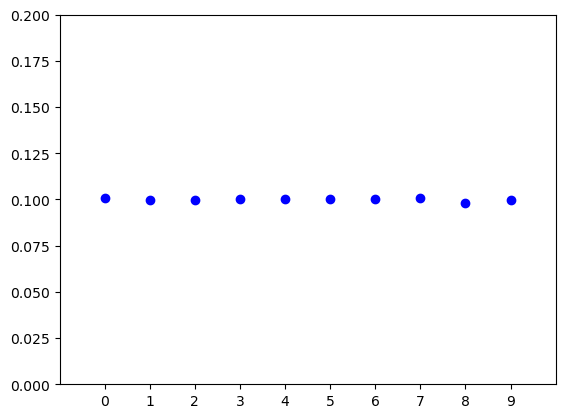

In [41]:
#Возможно понял задачу не правильно.
#Понял так: участник тащит билеты пока не вытащит выйгрышный,
#А "чистый выйгрыш" это то что выйграл за минусом то что потратил на пакупку билетов

w = list(range(10))[::-1] #размер выйгрыша в зависимости от того на каком шаге попадется выйгрышный билет

n = 100000
dict_win_size = {'win_size': [np.random.choice(w) for x in range(n)]}
A7 = pd.DataFrame(data = dict_win_size)
x1 = A7['win_size'].sort_values(ascending=True).unique() 
y1 = A7['win_size'].value_counts(normalize=True).sort_index(ascending=True)
plt.scatter(x1, y1, color="blue" )
plt.axis([-1,10,0,0.2])
plt.plot()
plt.xticks(np.arange(len(x1)), x1)
A7['win_size'].value_counts(normalize=True).sort_index(ascending=True)

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

2     0.02751
3     0.05562
4     0.08189
5     0.11089
6     0.13811
7     0.16864
8     0.13870
9     0.11218
10    0.08359
11    0.05479
12    0.02808
Name: Sum, dtype: float64

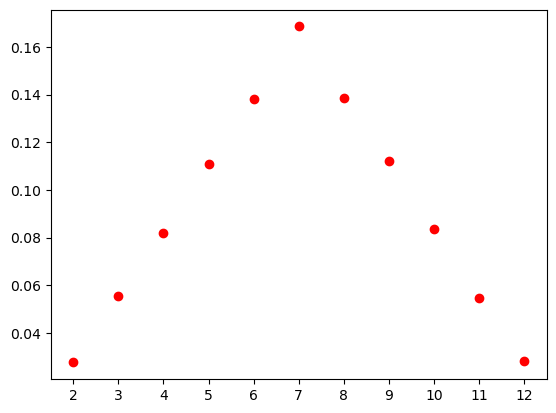

In [51]:
dice = [ x for x in range(1,7)]

n = 100000
dict_two_dice = {'dice_1': [np.random.choice(dice) for x in range(n)],
                  'dice_2': [np.random.choice(dice) for x in range(n)]}
A8 = pd.DataFrame(data=dict_two_dice)
A8['Sum'] = A8['dice_1']+A8['dice_2']
# закон распределения
x = A8['Sum'].sort_values(ascending=True).unique() 
y = A8['Sum'].value_counts(normalize=True).sort_index(ascending=True)
plt.scatter(x, y, color="red" )
plt.plot()
plt.xticks(x, x)
A8['Sum'].value_counts(normalize=True).sort_index(ascending=True)

In [56]:
P1_A8 = len(A8[(A8['Sum']<=4)])/len(A8)
P2_A8 = len(A8[(A8['Sum']>4)])/len(A8)
print('Вероятности событий ${X <= 4}$: '+str(P1_A8))
print('Вероятности событий ${X > 4}$: '+str(P2_A8))

Вероятности событий ${X <= 4}$: 0.16502
Вероятности событий ${X > 4}$: 0.83498


## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [77]:
rank = ['6','7','8','9','10','Jack','Queen','King','Ace']
suit = ['-diamonds','-hearts', '-clubs','-spades']
deck =[]
for i in rank:
    for j in suit: 
        deck.append(i+j)
deck
n = 100000
A = 0
B = 0
for s in range(n):
    t = deck.copy()
    first_card = np.random.choice(t)
    t.remove(first_card)
    second_card = np.random.choice(t)
    if first_card[0] == '6' and second_card[0] == '7':
        A += 1
    if first_card == '6-diamonds' and second_card == '7-diamonds':
        B += 1

print(f'Вероятность того, что первая - шестерка, а вторая - семерка: {A/n}')
print(f'Вероятность того, что первая - бубновая шестерка, а вторая - бубновая семерка: {B/n}')

Вероятность того, что первая - шестерка, а вторая - семерка: 0.01216
Вероятность того, что первая - бубновая шестерка, а вторая - бубновая семерка: 0.0008


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [84]:
def fill_urn (n_white, n_black=0):
    return ["white"]*n_white + ['black']*n_black

urn = fill_urn(2,3)
n = 100000
A_10 = 0
B_10 = 0
for i in range(n):
    tmp = urn.copy()
    first_ball = np.random.choice(tmp)
    tmp.remove(first_ball)
    if first_ball == 'black':
        tmp.append('white')
    second_ball = np.random.choice(tmp)
    if first_ball == 'white' and second_ball == 'white':
        A_10 += 1
    if first_ball == 'black' and second_ball == 'black':
        B_10 += 1
print(f'Вероятность события 𝐴(извлечены два белых шара): {A_10/n}')
print(f'Вероятность события 𝐵(извлечены два черных шара): {B_10/n}')


Вероятность события 𝐴(извлечены два белых шара): 0.10088
Вероятность события 𝐵(извлечены два черных шара): 0.24197
